In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outsin

/kaggle/input/restaurant-csv-file/Dataset  (2).csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random


Reading CSV Restaurant file

In [3]:
data = pd.read_csv("/kaggle/input/restaurant-csv-file/Dataset  (2).csv")

In [4]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
data.shape

(9551, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Identify if there are any restaurant chains present in the dataset

In [7]:
#Total countrs of each restaurant:

restaurant_counts = data['Restaurant Name'].value_counts()
restaurant_counts

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64

In [8]:
#identify restaurant chains
 
restaurant_chains = restaurant_counts[restaurant_counts > 1].index.tolist()
print('Restaurant chains:')
print(restaurant_chains)


Restaurant chains:
['Cafe Coffee Day', "Domino's Pizza", 'Subway', 'Green Chick Chop', "McDonald's", 'Keventers', 'Pizza Hut', 'Giani', 'Baskin Robbins', 'Barbeque Nation', "Giani's", 'Barista', "Dunkin' Donuts", 'Costa Coffee', 'Pind Balluchi', 'Wah Ji Wah', 'Twenty Four Seven', 'Pizza Hut Delivery', 'Sagar Ratna', 'Republic of Chicken', 'KFC', 'Starbucks', 'Chaayos', 'Burger King', "Haldiram's", 'Shree Rathnam', 'Frontier', 'Moti Mahal Delux', 'Bikanervala', 'Aggarwal Sweets', 'Behrouz Biryani', "Karim's", 'Bikaner Sweets', 'Chicago Pizza', 'Apni Rasoi', '34, Chowringhee Lane', 'Wow! Momo', 'Madras Cafe', 'Burger Point', 'Gopala', 'Shama Chicken Corner', "Berco's", "Nirula's Ice Cream", 'Sardar A Pure Meat Shop', 'Yo! China', 'Cocoberry', 'Punjabi Tadka', 'Angels in my Kitchen', 'Faasos', 'Ovenstory Pizza', 'Chowringhee', 'Punjabi Chaap Corner', 'Kebab Xpress', 'Nazeer Foods', 'RollsKing', 'Tpot', 'Mocha', 'Dolce Gelato', "Tibb's Frankie", 'The Yellow Chilli', 'Slice of Italy', 'BTW'

# Analyze the ratings and popularity of different restaurant chains.

In [9]:
# Filter out the data for restaurant chain only:
restaurants_chain_data = data.loc[data['Restaurant Name'].isin(restaurant_chains)]

# Calculate average rating and popularity (i.e., Votes) for each restaurant chain
restaurants_chain_avg_rating = restaurants_chain_data.groupby('Restaurant Name')['Votes'].mean()
restaurants_chain_total_votes = restaurants_chain_data.groupby('Restaurant Name')['Votes'].sum()

# Create a DataFrame and store the calculated data:
chain_information = pd.DataFrame({'Average rating': restaurants_chain_avg_rating, 'Total votes': restaurants_chain_total_votes})
print('Restaurant chain ratings and Popularity:')
chain_information = chain_information.sort_values('Average rating', ascending=False)
print(chain_information)


Restaurant chain ratings and Popularity:
                           Average rating  Total votes
Restaurant Name                                       
Truffles                      4841.000000         9682
Joey's Pizza                  3903.500000         7807
AB's - Absolute Barbecues     3350.000000        13400
Big Chill                     2713.250000        10853
Big Yellow Door               2503.666667         7511
...                                   ...          ...
Whatslife.in                     0.000000            0
Bikaner Misthan Bhandar          0.000000            0
Chinese Fast Food                0.000000            0
The Big Scoop                    0.000000            0
Dev Food                         0.000000            0

[734 rows x 2 columns]


# Plot the locations of restaurants on a map using longitude and latitude coordinates.

In [10]:
!pip install geopandas

/tmp/ipykernel_33/2752736038.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


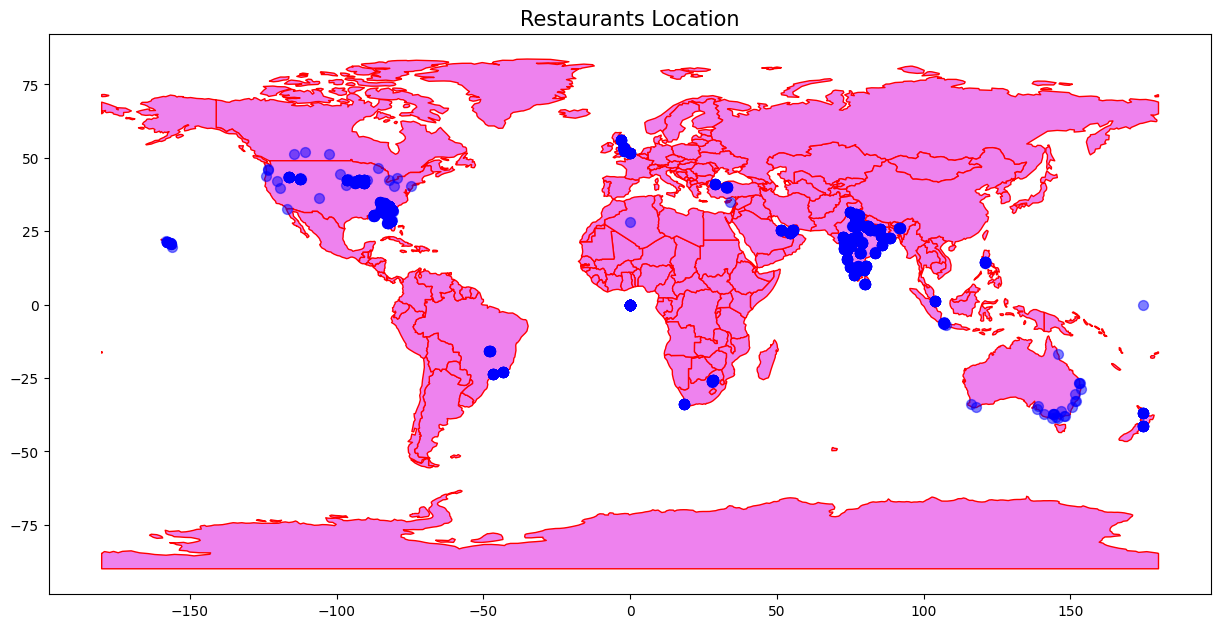

In [11]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with Latitude and Longitude

geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
gdf = gpd.GeoDataFrame(data, geometry=geometry)
            
# Read world map dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
        
# Plot the world map and restaurant Locations
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='violet', edgecolor='red')
gdf.plot(ax=ax, color='blue', markersize=50, alpha=0.5, marker='o', label='Restaurants')
ax.set_title('Restaurants Location', size=15)
plt.show()


# Identify any patterns or clusters of restaurants in specific areas.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


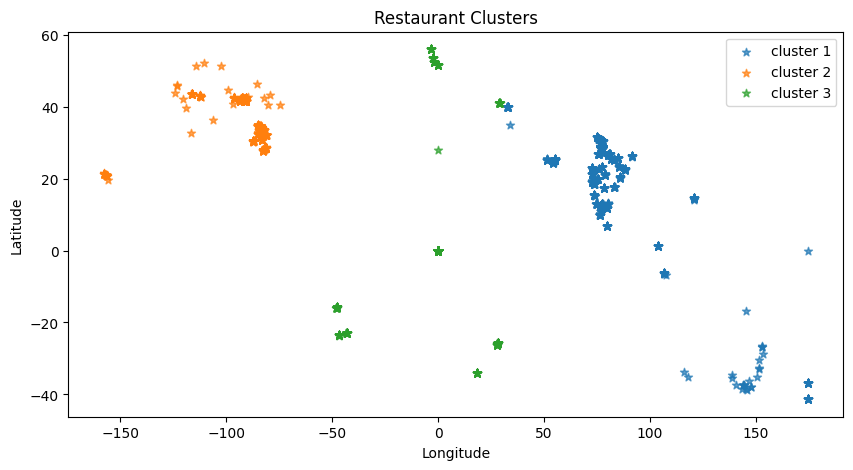

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Standardize the latitude and longitude
scaler = StandardScaler()
coordinates = data[['Latitude', 'Longitude']]
scaled_coordinates = scaler.fit_transform(coordinates)

# Perform KMeans Clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(coordinates)

# Plot the clusters
plt.figure(figsize=(10, 5))
for cluster in range(num_clusters):
    cluster_data = data.loc[data['cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], marker="*", alpha=0.7, label=f'cluster {cluster+1}')
plt.legend()
plt.title('Restaurant Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# Identify the most common combinations of cuisines in the dataset.

In [13]:
data.dropna(subset='Cuisines', inplace=True)

# Identify most common combinations of cusines:

cuisine_combinations = data['Cuisines'].str.split(', ').apply(','.join)
most_common_cuisines_combinations = cuisine_combinations.value_counts().head(5)
most_common_cuisines_combinations

Cuisines
North Indian            936
North Indian,Chinese    511
Chinese                 354
Fast Food               354
North Indian,Mughlai    334
Name: count, dtype: int64

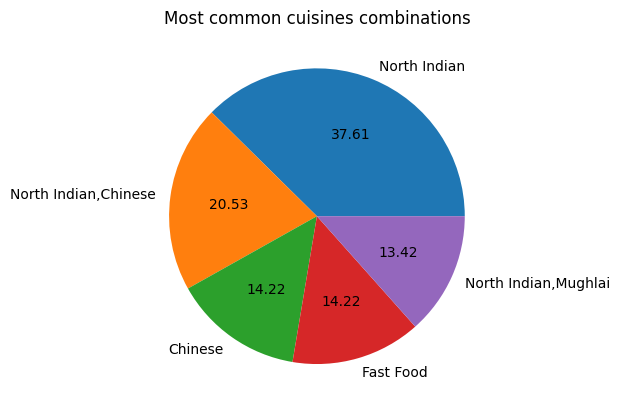

In [14]:
plt.pie(most_common_cuisines_combinations, labels = most_common_cuisines_combinations.index, autopct='%.2f')
plt.title('Most common cuisines combinations')
plt.show()

# Determine if certain cuisine combinations tend to have higher ratings.

In [15]:
avg_ratings_by_combination = data.groupby(cuisine_combinations).agg({'Aggregate rating':'mean'})
print('Average ratings by cuisine combination')
print(avg_ratings_by_combination)


Average ratings by cuisine combination
                                        Aggregate rating
Cuisines                                                
Afghani                                            0.725
Afghani,Mughlai,Chinese                            0.000
Afghani,North Indian                               0.000
Afghani,North Indian,Pakistani,Arabian             0.000
African                                            4.700
...                                                  ...
Western,Asian,Cafe                                 4.200
Western,Fusion,Fast Food                           3.200
World Cuisine                                      4.900
World Cuisine,Mexican,Italian                      4.400
World Cuisine,Patisserie,Cafe                      4.200

[1825 rows x 1 columns]


In [16]:
#Further analyze the relationship between cuisine combinations and rating :

overall_avg_rating = data['Aggregate rating'].mean()

overall_avg_rating = round(overall_avg_rating,2)
print('Overall average rating:',overall_avg_rating)

Overall average rating: 2.67


In [17]:
average_ratings_by_combination = data.groupby(cuisine_combinations)['Aggregate rating'].mean()
print("\nAverage Ratings by Cuisine Combination:")
print(average_ratings_by_combination)

print("{:<65}{:<25}{:<35}".format("Cuisine combination","Average rating","Difference from overall average"))
overall_avg_rating = data['Aggregate rating'].mean()
for combination, avg_rating in average_ratings_by_combination.items():
    print(f"{combination:<65}{avg_rating:<25.2f}{avg_rating - overall_avg_rating:<30.2f}")



Average Ratings by Cuisine Combination:
Cuisines
Afghani                                   0.725
Afghani,Mughlai,Chinese                   0.000
Afghani,North Indian                      0.000
Afghani,North Indian,Pakistani,Arabian    0.000
African                                   4.700
                                          ...  
Western,Asian,Cafe                        4.200
Western,Fusion,Fast Food                  3.200
World Cuisine                             4.900
World Cuisine,Mexican,Italian             4.400
World Cuisine,Patisserie,Cafe             4.200
Name: Aggregate rating, Length: 1825, dtype: float64
Cuisine combination                                              Average rating           Difference from overall average    
Afghani                                                          0.72                     -1.94                         
Afghani,Mughlai,Chinese                                          0.00                     -2.67                         
A

# Analyze the distribution of aggregate ratings and determine the most common rating range

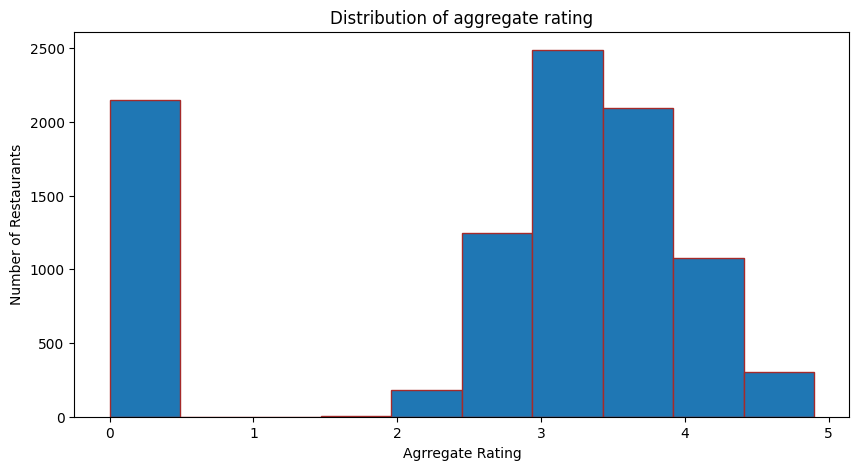

In [18]:
# Analyze the distribution of aggregate ratings:

plt.figure(figsize=(10,5))
plt.hist(data['Aggregate rating'], edgecolor='Brown')
plt.title('Distribution of aggregate rating')
plt.xlabel('Agrregate Rating')
plt.ylabel('Number of Restaurants')
plt.show()

In [19]:
# Determine the most common rating :

most_common_rating_range = data['Aggregate rating'].apply(lambda x: round(x * 2) / 2).mode()[0]
print("Most common rating range:", most_common_rating_range)

Most common rating range: 3.5


# Calculate the average number of votes received by restaurants.

In [20]:
import pandas as pd

print('Average number of Votes received by restaurants:', round(data['Votes'].mean(), 2))


Average number of Votes received by restaurants: 156.77


# Determine the percentage of restaurants that offer online delivery

In [21]:
total_online_delivery_restaurants = len(data.loc[data['Has Online delivery'] == 'Yes'])
restaurants_with_delivery_percentage = (total_online_delivery_restaurants / len(data)) * 100
print('Percentage of restaurants with online delivery:', round(restaurants_with_delivery_percentage, 2), "%")


Percentage of restaurants with online delivery: 25.69 %


# Compare the average ratings of restaurants with and without online delivery

In [22]:
# Calculate the average ratings for restaurants with online delivery
restaurants_with_online_delivery = data.loc[data['Has Online delivery'] == 'Yes']

# Calculate the average ratings for restaurants with online delivery
avg_rating_with_online_delivery =  restaurants_with_online_delivery['Aggregate rating'].mean()

# Print the average rating for restaurants with online delivery
print('Average rating of restaurants with online delivery:', round(avg_rating_with_online_delivery, 2))


Average rating of restaurants with online delivery: 3.25


In [23]:


# Calculate the average ratings for restaurants without online delivery
restaurants_without_online_delivery = data.loc[data['Has Online delivery'] == 'No']
avg_rating_without_delivery =  restaurants_without_online_delivery['Aggregate rating'].mean()

# Print the average ratings 
print('Average rating of restaurants without online delivery:', round(avg_rating_without_delivery, 2))


Average rating of restaurants without online delivery: 2.46


# Price Range Distribution
# Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

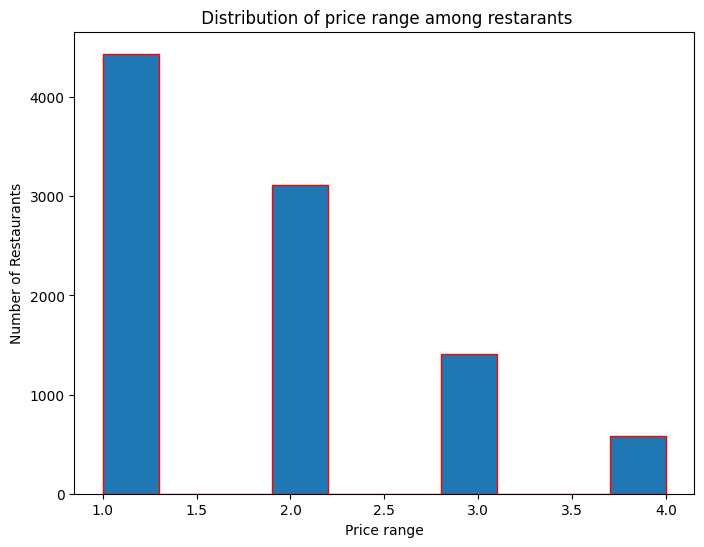

In [24]:
plt.subplots(figsize=(8,6))
plt.hist(data['Price range'], edgecolor='red')
plt.title(' Distribution of price range among restarants')
plt.xlabel('Price range')
plt.ylabel('Number of Restaurants')
plt.show()

# Calculate the percentage of restaurants in each price range category.

In [25]:
price_range_counts = data['Price range'].value_counts().reset_index()
price_range_counts

,Price range,count
0,1,4438
1,2,3113
2,3,1405
3,4,586


In [26]:
import pandas as pd
price_range_counts = data['Price range'].value_counts().sort_index()
total_restaurants = len(data)
percentage_per_price_range = (price_range_counts / total_restaurants) * 100

print("Percentage of restaurants in each price range category:")
for price_range, percentage in percentage_per_price_range.items():
    print("Price Range {} : {:.2f}%" .format(price_range, percentage))

Percentage of restaurants in each price range category:
Price Range 1 : 46.51%
Price Range 2 : 32.62%
Price Range 3 : 14.72%
Price Range 4 : 6.14%


/tmp/ipykernel_33/3863114496.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(x)) + '%' for x in ax.get_yticks()])


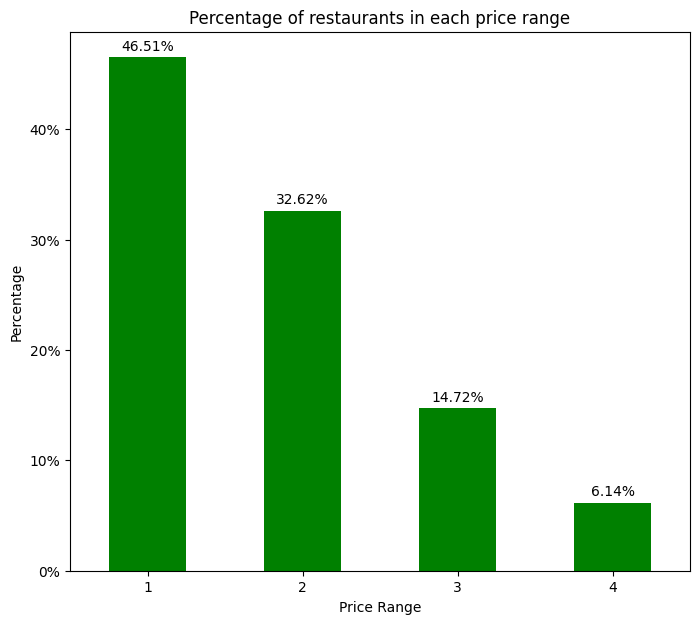

In [27]:
import matplotlib.pyplot as plt

# Assuming 'percentage_per_price_range' is your DataFrame or Series containing the data
fig, ax = plt.subplots(figsize=(8, 7))
percentage_per_price_range.plot(kind='bar', color='green', ax=ax)

for bar in ax.containers[0]:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_yticklabels([str(int(x)) + '%' for x in ax.get_yticks()])
plt.xticks(rotation=0)  # Corrected xlabel rotation
plt.title('Percentage of restaurants in each price range')
plt.xlabel('Price Range')  # Corrected xlabel
plt.ylabel('Percentage')
plt.show()


#  City Analysis 
# Identify the city with the highest number of restaurants in the dataset.

In [28]:
print(data['City'].value_counts()[[0]].index[0])

New Delhi


/tmp/ipykernel_33/4188225808.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(data['City'].value_counts()[[0]].index[0])


# **Calculate the average rating for restaurants in each city

In [29]:
average_restaurant_rating = data.groupby('City').agg(Average_Rating=('Aggregate rating','mean')).sort_values('Average_Rating',ascending=True)
average_restaurant_rating

,Average_Rating
City,
Faridabad,1.866932
Noida,2.036204
Mc Millan,2.400000
Montville,2.400000
New Delhi,2.438845
...,...
Mandaluyong City,4.625000
Pasig City,4.633333
Makati City,4.650000


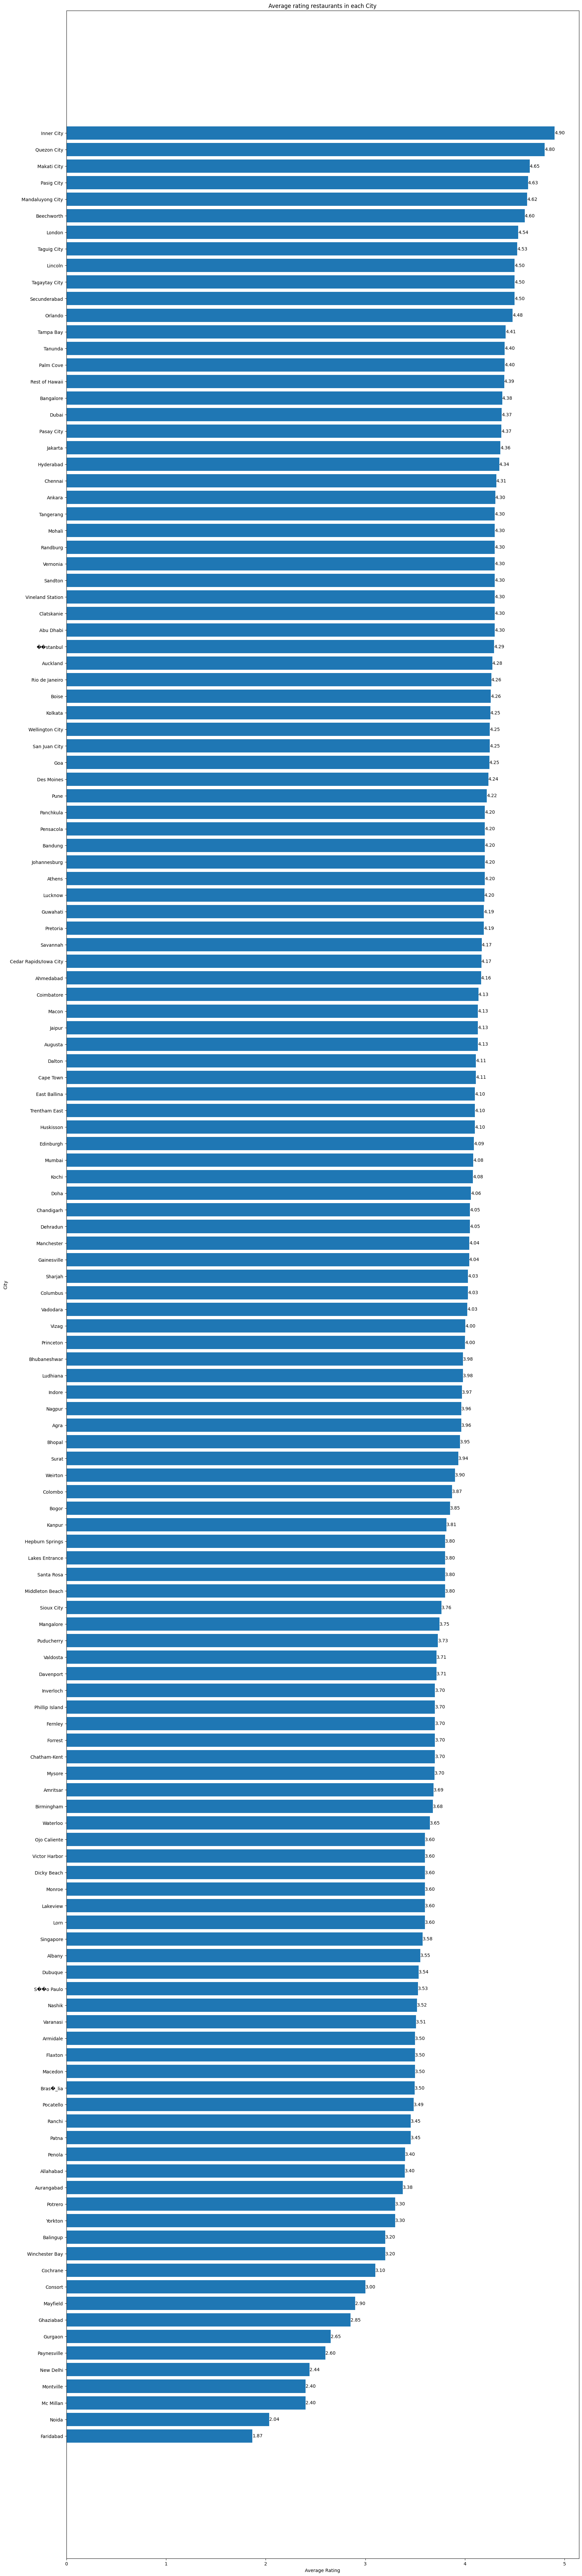

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'City' and calculate the mean of 'Aggregate rating'
average_restaurant_rating = data.groupby('City').agg(Average_Rating=('Aggregate rating', 'mean')).sort_values('Average_Rating', ascending=True)

# Setting up the figure size
plt.subplots(figsize=(20,100))

# Creating the Bar Chart
bars = plt.barh(average_restaurant_rating.index, average_restaurant_rating['Average_Rating']) # Horizontal bar chart

# Adding data labels
for bar in bars:
    plt.text(bar.get_width(),
             bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():.2f}', ha='left', va='center')

plt.title('Average rating restaurants in each City')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()



# Determine the city with the highest average rating

In [31]:


# Group by 'City' and calculate the mean of 'Aggregate rating'
average_restaurant_rating = data.groupby('City').agg(Average_Rating=('Aggregate rating', 'mean')).sort_values('Average_Rating', ascending=True)

# Accessing the index of the first row to get the city with the highest average rating
highest_rated_city = average_restaurant_rating.index[0]

print('The city with the highest average rating:', highest_rated_city)


The city with the highest average rating: Faridabad


***Determine the top three most common cuisines***

In [32]:
cuisine_counts = data['Cuisines'].str.split(',').explode().value_counts()

top_three_cusines = cuisine_counts.head(3)
print('Top three most common cuisines')
top_three_cusines

Top three most common cuisines


Cuisines
North Indian    2992
 Chinese        1880
 Fast Food      1314
Name: count, dtype: int64

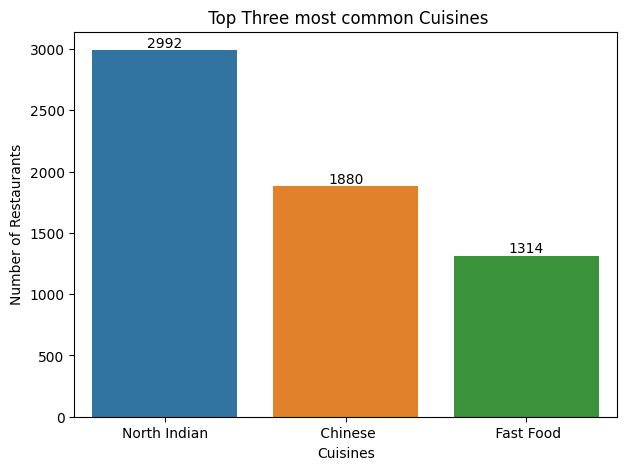

In [33]:

fig, ax = plt.subplots(figsize=(7,5))
ax = sns.barplot(x=top_three_cusines.index, y=top_three_cusines.values)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title(' Top Three most common Cuisines')
plt.ylabel('Number of Restaurants')
plt.show()


***Calculate the percentage of restaurants that serve each of the top cuisines.***


In [34]:
total_restaurants = len(data)
percentage_per_cuisine = ( top_three_cusines/ total_restaurants) * 100

print('Percentage of restaurants for top three cusines')
percentage_per_cuisine


Percentage of restaurants for top three cusines


Cuisines
North Indian    31.356110
 Chinese        19.702368
 Fast Food      13.770698
Name: count, dtype: float64

/tmp/ipykernel_33/2611929757.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(x)) + '%' for x in ax.get_yticks()])


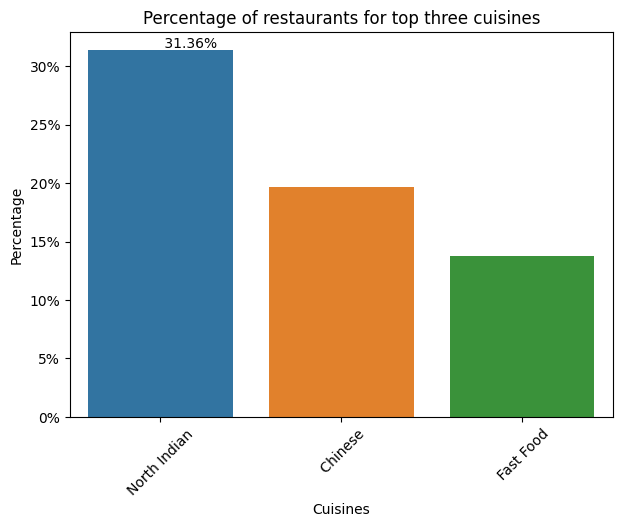

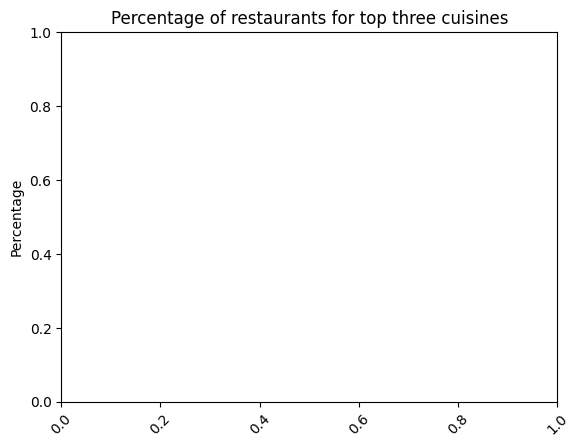

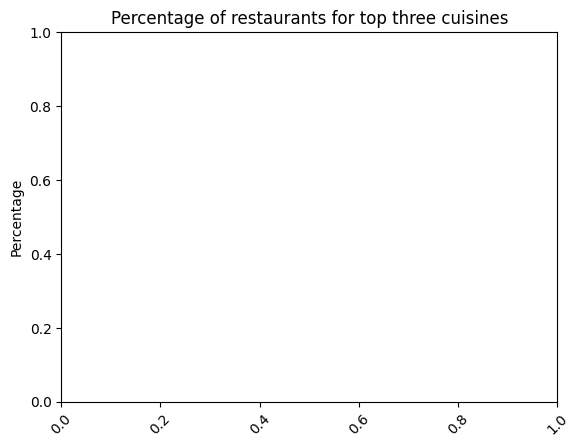

In [35]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.barplot(x=percentage_per_cuisine.index, y=percentage_per_cuisine.values)
for bar in ax.containers[0]:
    height = bar.get_height()
    ax.annotate(f'{height: .2f}%' ,
               xy=(bar.get_x () + bar.get_width() / 2, height),
               xytext=(0, 2) ,
               textcoords="offset points",)
    plt.title('Percentage of restaurants for top three cuisines')
    plt.xticks(rotation=45)
    ax.set_yticklabels([str(int(x)) + '%' for x in ax.get_yticks()])
    plt.ylabel('Percentage')
    plt.show()
    